In [16]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model

In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx"
df = pd.read_excel(url)
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [5]:
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.71,710.5,269.5,220.5,3.5,4,0.25,1,12.57,15.44
1,0.79,637.0,343.0,147.0,7.0,5,0.25,1,39.04,45.52
2,0.86,588.0,294.0,147.0,7.0,4,0.25,2,29.27,29.90
3,0.71,710.5,269.5,220.5,3.5,3,0.10,3,10.68,13.77
4,0.69,735.0,294.0,220.5,3.5,2,0.25,5,12.47,15.14


In [13]:
train, test = train_test_split(df, test_size=0.2)
train_stats = train.describe()

train_stats.pop("Y1")
train_stats.pop("Y2")
train_stats = train_stats.transpose()

train_y = train.pop("Y1"), train.pop("Y2")
test_y = test.pop("Y1"), test.pop("Y2")

norm_train_X = (train - train_stats["mean"]) / train_stats["std"]
norm_test_X = (test - train_stats["mean"]) / train_stats["std"]

In [14]:
norm_train_X

,X1,X2,X3,X4,X5,X6,X7,X8
758,-0.961950,0.973216,0.025762,0.932394,-0.957734,0.445686,-1.754471,-1.793820
647,-0.011914,-0.144753,2.285499,-1.238184,1.042431,1.342902,-1.002205,-0.500331
526,-0.961950,0.973216,0.025762,0.932394,-0.957734,1.342902,0.126195,0.793157
471,-0.961950,0.973216,0.025762,0.932394,-0.957734,1.342902,0.126195,-1.147076
135,-1.341964,1.532201,1.155631,0.932394,-0.957734,1.342902,0.126195,0.146413
...,...,...,...,...,...,...,...,...
673,-0.201921,0.134739,-1.669040,0.932394,-0.957734,-0.451531,0.126195,0.146413
6,0.273097,-0.424246,0.590697,-0.695539,1.042431,1.342902,0.126195,1.439901
718,0.273097,-0.424246,0.590697,-0.695539,1.042431,0.445686,-1.002205,-1.147076
570,-1.341964,1.532201,1.155631,0.932394,-0.957734,-1.348747,1.254594,-0.500331


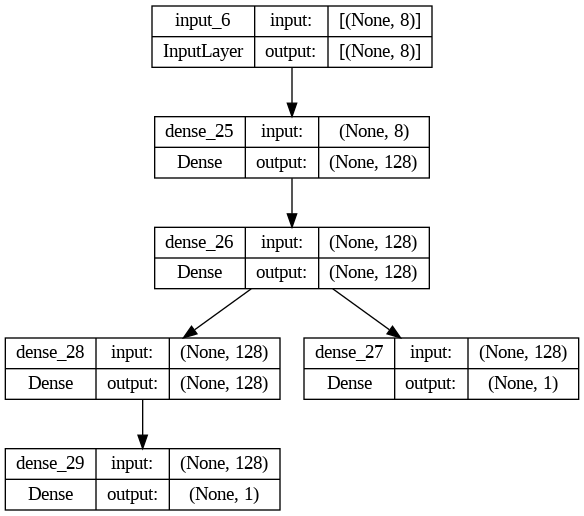

In [21]:
input_layer = tf.keras.layers.Input(shape=(8,))
first_layer = tf.keras.layers.Dense(128, activation=tf.nn.relu)(input_layer)
second_layer = tf.keras.layers.Dense(128, activation=tf.nn.relu)(first_layer)
output_1 = tf.keras.layers.Dense(1)(second_layer)
third_layer = tf.keras.layers.Dense(128, activation=tf.nn.relu)(second_layer)
output_2 = tf.keras.layers.Dense(1)(third_layer)

model = tf.keras.Model(inputs=input_layer, outputs=[output_1, output_2])
plot_model(model, show_shapes=True)